In [13]:
pip install scikit-learn

                                              0.0/8.3 MB ? eta -:--:--
                                              0.0/8.3 MB 660.6 kB/s eta 0:00:13
                                              0.0/8.3 MB 660.6 kB/s eta 0:00:13
                                              0.0/8.3 MB 245.8 kB/s eta 0:00:34
                                              0.1/8.3 MB 476.3 kB/s eta 0:00:18
                                              0.1/8.3 MB 544.7 kB/s eta 0:00:15
                                              0.2/8.3 MB 577.4 kB/s eta 0:00:15
     -                                        0.3/8.3 MB 811.7 kB/s eta 0:00:10
     -                                        0.3/8.3 MB 811.7 kB/s eta 0:00:10
     --                                       0.4/8.3 MB 1.0 MB/s eta 0:00:08
     --                                       0.6/8.3 MB 1.3 MB/s eta 0:00:06
     ---                                      0.7/8.3 MB 1.3 MB/s eta 0:00:06
     ----                                     1.0/8.3 M

In [37]:
import pandas as pd

In [38]:
loan_test = pd.read_csv(r"C:\Users\nmani\OneDrive\Desktop\loan-test.csv")
loan_train = pd.read_csv(r"C:\Users\nmani\OneDrive\Desktop\loan-train.csv")

In [39]:
loan_train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


Write up an analysis design for your project
-What are you trying to build?
    -- Loan Predictor, given information about a person we should automatically be able to decide if that person will be                approved for a loan (Yes/No)
    
--Include a literature review of relevant public work
    --https://www.kaggle.com/datasets/vikasukani/loan-eligible-dataset
    --https://www.kaggle.com/code/vikasukani/loan-eligibility-prediction-machine-learning
    --https://towardsdatascience.com/predict-loan-eligibility-using-machine-learning-models-7a14ef904057
    --https://www.technologyreview.com/2021/06/17/1026519/racial-bias-noisy-data-credit-scores-mortgage-loans-fairness-machine-learning/  <-- can predictors be unfair to certain groups
    --https://www.wellsfargo.com/financial-education/credit-management/five-c/#:~:text=Lenders%20need%20to%20determine%20whether,income%20may%20all%20be%20considered.  <--how banks decide loans

--What data will you leverage?
    -- https://www.kaggle.com/datasets/vikasukani/loan-eligible-dataset
    
--Any assumptions you need to make with the data you have or risks to the project given what you have available?
    -- how many null data entries, 
       how big is a the train data set would larger dataset be better?, 
       what are the distributions of the dataset (gender, marital_status,education)
       how to prevent overfit and underfit
       removing bias
       credit score is not a predictor, no previous loans
       
--What modeling techniques might you leverage?
    -- since we want to decide whether a person will be approved for a loan (yes/no) a classification model would work best.
       Checking the variances between each predictor variable? confusion matrix
       Check the distributions of predictors (how many males vs females etc)
       Classification models:
           Logistic Regression: 
           Linear Discriminate Analysis: Does each individual predictor follow a multivariate normal distribution?
           Quadratic Discriminate Analysis: Each class has its own covariance matrix?
           Naive Bayes: Good for independent predictor variables, introduces bias but reduces variance


Column Variables Descriptions
-Loan_ID	Unique Loan ID
-Gender	Male/ Female
-Married	Applicant married (Y/N)
-Dependents	Number of dependents
-Education	Applicant Education (Graduate/ Under Graduate)
-Self_Employed	Self-employed (Y/N)
-ApplicantIncome	Applicant income
-CoapplicantIncome	Coapplicant income
-LoanAmount	Loan amount in thousands
-Loan_Amount_Term	Term of a loan in months
-Credit_History	credit history meets guidelines
-Property_Area	Urban/ Semi-Urban/ Rural
-Loan_Status	Loan approved (Y/N)

In [40]:
loan_train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [41]:
loan_test.isnull().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [42]:
loan_train.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [43]:
loan_train.shape

(614, 13)

What can I say about missing data? Missing because lack of information is it better to fillna with the means and modes


How to treat missing data?
-filling the data with means and modes (where applicable), first code the categorical data to yes:1 and no:0

In [44]:
test = loan_test.copy()
train = loan_train.copy()

In [45]:
test # where is the loan status column

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban
...,...,...,...,...,...,...,...,...,...,...,...,...
362,LP002971,Male,Yes,3+,Not Graduate,Yes,4009,1777,113.0,360.0,1.0,Urban
363,LP002975,Male,Yes,0,Graduate,No,4158,709,115.0,360.0,1.0,Urban
364,LP002980,Male,No,0,Graduate,No,3250,1993,126.0,360.0,NaN,Semiurban
365,LP002986,Male,Yes,0,Graduate,No,5000,2393,158.0,360.0,1.0,Rural


In [46]:
from sklearn.preprocessing import LabelEncoder
features = ['Property_Area','Education', 'Dependents']
le = LabelEncoder()
for col in features:
    train[col] = le.fit_transform(train[col])
    test[col] = le.fit_transform(test[col])

In [47]:
#Encoding Categorical Variables
replacements = {'Yes':1, 'No':0, 'Y':1,'N':0,'Male':1,'Female':0,'Semiurban':1,'Urban':2,'Rural':3}

train.Loan_Status = train.Loan_Status.replace(replacements)


train.Gender = train.Gender.replace(replacements)
test.Gender = test.Gender.replace(replacements)

train.Married = train.Married.replace(replacements)
test.Married = test.Married.replace(replacements)

train.Self_Employed = train.Self_Employed.replace(replacements)
test.Self_Employed = test.Self_Employed.replace(replacements)

#does it make sense to convert Property_Area
#train.Property_Area = train.Property_Area.replace(replacements)
#test.Property_Area = test.Property_Area.replace(replacements)

In [48]:
#Replacing nan and na values with mean and mode
train['Gender'].fillna(train['Gender'].mode()[0],inplace=True)
test['Gender'].fillna(test['Gender'].mode()[0],inplace=True)

train['Married'].fillna(train['Married'].mode()[0],inplace=True)
test['Married'].fillna(test['Married'].mode()[0],inplace=True)

train['Self_Employed'].fillna(train['Self_Employed'].mode()[0],inplace=True)
test['Self_Employed'].fillna(test['Self_Employed'].mode()[0],inplace=True)

train['Dependents'].fillna(train['Dependents'].mode()[0],inplace=True)
test['Dependents'].fillna(test['Dependents'].mode()[0],inplace=True)

train['LoanAmount'].fillna(train['LoanAmount'].mean(),inplace=True)
test['LoanAmount'].fillna(test['LoanAmount'].mean(),inplace=True)

train['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].mean(),inplace=True)
test['Loan_Amount_Term'].fillna(test['Loan_Amount_Term'].mean(),inplace=True)

train['Credit_History'].fillna(train['Credit_History'].mean(),inplace=True)
test['Credit_History'].fillna(test['Credit_History'].mean(),inplace=True)

In [49]:
train['Loan_Status'].value_counts()

Loan_Status
1    422
0    192
Name: count, dtype: int64

With the values of loan status being as is how does this affect our model? where we have more yes observations than no?

<Axes: xlabel='Loan_Status'>

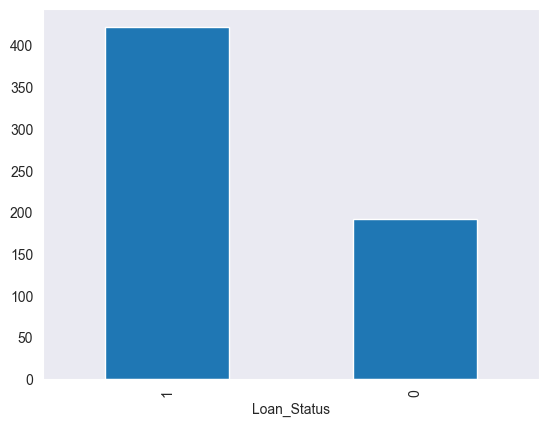

In [50]:
train['Loan_Status'].value_counts().plot.bar()

In [51]:
train.describe()


,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,0.817590,0.653094,0.842020,0.218241,0.133550,5403.459283,1621.245798,146.412162,342.000000,0.842199,1.037459,0.687296
std,0.386497,0.476373,1.120531,0.413389,0.340446,6109.041673,2926.248369,84.037468,64.372489,0.349681,0.787482,0.463973
min,0.000000,0.000000,0.000000,0.000000,0.000000,150.000000,0.000000,9.000000,12.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000,2877.500000,0.000000,100.250000,360.000000,1.000000,0.000000,0.000000
50%,1.000000,1.000000,0.000000,0.000000,0.000000,3812.500000,1188.500000,129.000000,360.000000,1.000000,1.000000,1.000000
75%,1.000000,1.000000,2.000000,0.000000,0.000000,5795.000000,2297.250000,164.750000,360.000000,1.000000,2.000000,1.000000
max,1.000000,1.000000,4.000000,1.000000,1.000000,81000.000000,41667.000000,700.000000,480.000000,1.000000,2.000000,1.000000


<Axes: >

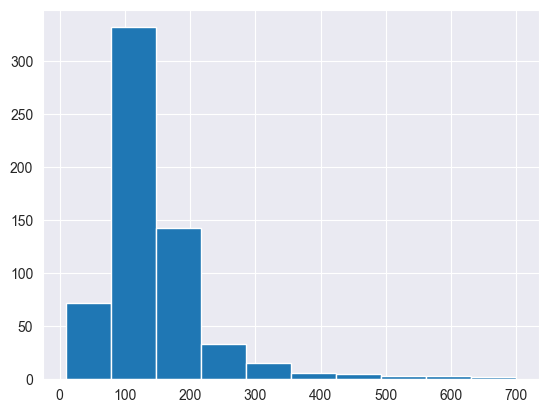

In [52]:
#Why is it important to look at the distributions

train['LoanAmount'].hist(bins=10)

<Axes: >

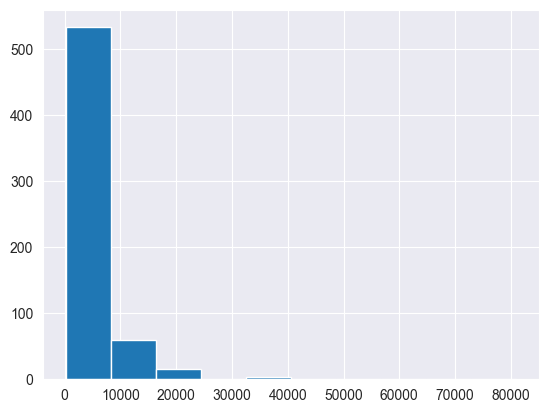

In [53]:
train['ApplicantIncome'].hist(bins=10)

<Axes: >

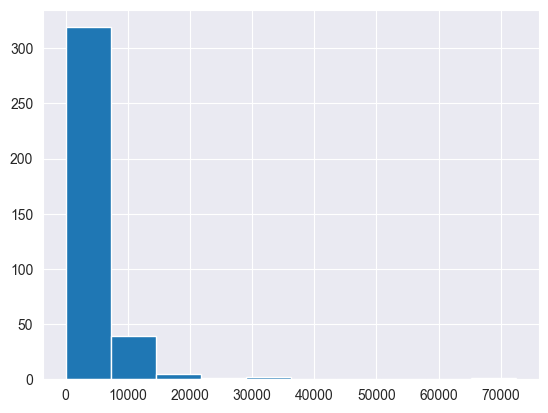

In [54]:
#how similar are the train and test sets
test['ApplicantIncome'].hist(bins=10)

In [55]:
train = train.drop('Loan_ID',axis=1)

In [56]:
#how are the variables correlated

train.corr()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Gender,1.000000,0.364569,0.151824,0.045364,-0.000525,0.058809,0.082912,0.107930,-0.073567,0.012819,-0.025752,0.017987
Married,0.364569,1.000000,0.315849,0.012304,0.004489,0.051708,0.075948,0.147141,-0.100863,0.005852,0.004257,0.091478
Dependents,0.151824,0.315849,1.000000,0.060466,0.051121,0.103416,0.011146,0.130722,-0.073683,-0.077539,0.032600,-0.007318
Education,0.045364,0.012304,0.060466,1.000000,-0.010383,-0.140760,-0.062290,-0.166998,-0.077242,-0.077936,-0.065243,-0.085884
Self_Employed,-0.000525,0.004489,0.051121,-0.010383,1.000000,0.127180,-0.016100,0.115260,-0.033943,-0.002260,-0.030860,-0.003700
ApplicantIncome,0.058809,0.051708,0.103416,-0.140760,0.127180,1.000000,-0.116605,0.565620,-0.045242,-0.014477,-0.009500,-0.004710
CoapplicantIncome,0.082912,0.075948,0.011146,-0.062290,-0.016100,-0.116605,1.000000,0.187828,-0.059675,-0.001665,0.010522,-0.059187
LoanAmount,0.107930,0.147141,0.130722,-0.166998,0.115260,0.565620,0.187828,1.000000,0.038801,-0.007738,-0.044776,-0.036416
Loan_Amount_Term,-0.073567,-0.100863,-0.073683,-0.077242,-0.033943,-0.045242,-0.059675,0.038801,1.000000,0.001395,-0.077620,-0.020974
Credit_History,0.012819,0.005852,-0.077539,-0.077936,-0.002260,-0.014477,-0.001665,-0.007738,0.001395,1.000000,-0.001880,0.540483


In [57]:
import seaborn as sns
sns.set_style('dark')
import matplotlib.pyplot as plt
%matplotlib inline


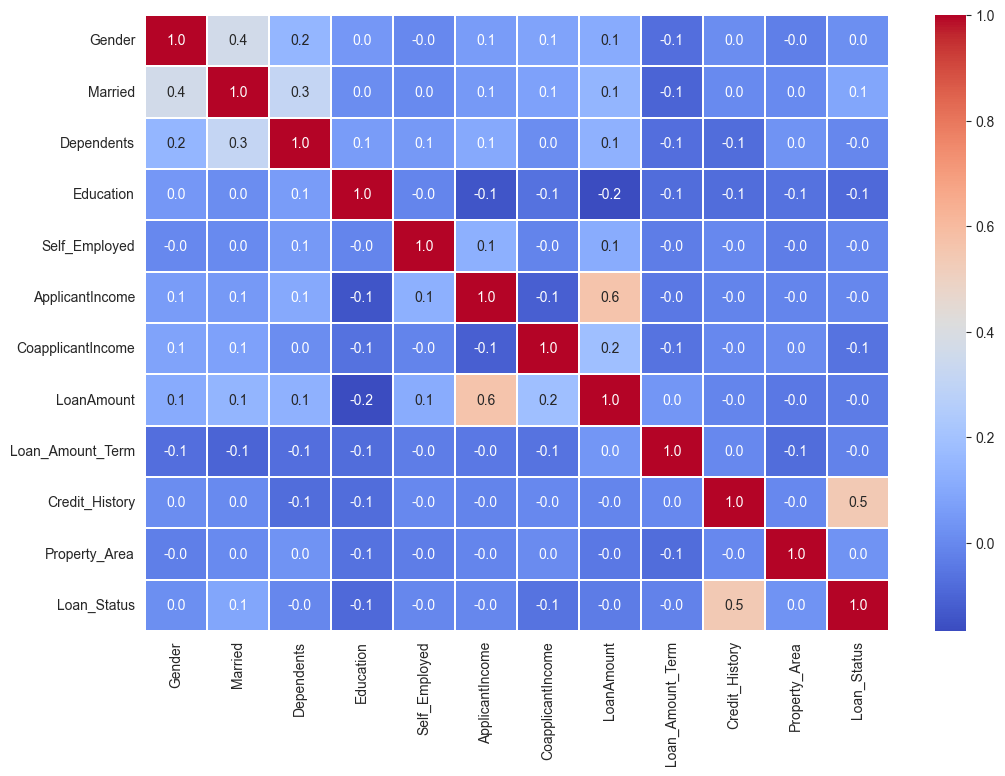

In [58]:
plt.figure(figsize=(12,8))
sns.heatmap(train.corr(), cmap='coolwarm', annot=True, fmt='.1f', linewidths=.1)
plt.show()

From the heatmap we can see that credit history has the greatest impact on whether or not a loan will be approved.

<Axes: >

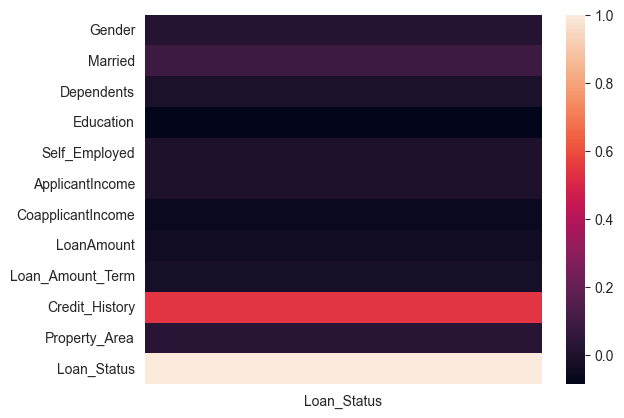

In [60]:
temp = train.corr()

temp = temp[['Loan_Status']]
sns.heatmap(temp)

In [64]:
temp = train.groupby(['Gender','Married','Dependents','Education','Property_Area'])['Loan_Status'].count()

In [65]:
temp #how to show full table? is this valuable

Gender  Married  Dependents  Education  Property_Area
0.0     0.0      0           0          0                13
                                        1                21
                                        2                16
                             1          0                 3
                                        1                 4
                                                         ..
1.0     1.0      4           0          1                 2
                                        2                 3
                             1          0                 1
                                        1                 2
                                        2                 1
Name: Loan_Status, Length: 76, dtype: int64

In [74]:
temp = train.groupby(['Loan_Status','Gender'])['Loan_Status'].count()
temp

Loan_Status  Gender
0            0.0        37
             1.0       155
1            0.0        75
             1.0       347
Name: Loan_Status, dtype: int64

In [81]:
#Denied Loans #is this dumb?
md = 155/(155+37+75+347)
fd = 37/(155+37+75+347)
ml = 347/(155+37+75+347)
fl = 75/(155+37+75+347)
print(f'Males denied {round(md,2)} % of the times, Females denied {round(fd,2)} % of the time')
print(f'Males accepted {round(ml,2)} % of the times, Females accepted {round(fl,2)} % of the time')

Males denied 0.25 % of the times, Females denied 0.06 % of the time
Males accepted 0.57 % of the times, Females accepted 0.12 % of the time


In [75]:
temp = train.groupby(['Loan_Status','Married'])['Loan_Status'].count()
temp

Loan_Status  Married
0            0.0         79
             1.0        113
1            0.0        134
             1.0        288
Name: Loan_Status, dtype: int64

In [76]:
temp = train.groupby(['Loan_Status','Dependents'])['Loan_Status'].count()
temp

Loan_Status  Dependents
0            0             107
             1              36
             2              25
             3              18
             4               6
1            0             238
             1              66
             2              76
             3              33
             4               9
Name: Loan_Status, dtype: int64

In [77]:
temp = train.groupby(['Loan_Status','Education'])['Loan_Status'].count()
temp

Loan_Status  Education
0            0            140
             1             52
1            0            340
             1             82
Name: Loan_Status, dtype: int64